<a href="https://colab.research.google.com/github/honlai/Financial_Mathematics_I/blob/main/Exercises2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Retrieve historical stock data and analyze its asset returns

In [ ]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
#股票代號
stocks_list=['2330.TW','2357.TW','2454.TW','3231.TW']
#開始日期
start_date='2023-01-01'
#完結日期
end_date='2023-10-01'
#股票數
N=len(stocks_list)
#次數
M=0#len(data)
# 創建一個空的的主數據框data
data = pd.DataFrame()
for stock in stocks_list:
    # yf.download(股票代號,start=開始日期,end=完結日期)
    # yf.download(股票代號,period=日期範圍(1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max),
    #         interval=頻率(1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo))
    df=yf.download(stock,start=start_date,end=end_date)
    df=df[['Adj Close']]#調整後收盤價
    df=df.rename(columns = {'Adj Close': stock})
    if data.empty:
        data = df
    else:
        data=pd.concat([data, df], axis=1)
    print(stock)

[*********************100%%**********************]  1 of 1 completed
2330.TW
[*********************100%%**********************]  1 of 1 completed
2357.TW
[*********************100%%**********************]  1 of 1 completed
2454.TW
[*********************100%%**********************]  1 of 1 completed
3231.TW


               2330.TW     2357.TW     2454.TW     3231.TW
Date                                                      
2023-01-03  445.975525  257.040009  581.645569   28.477310
2023-01-04  442.529816  255.612000  574.420105   28.672359
2023-01-05  451.390228  257.992004  569.904236   28.769884
2023-01-06  451.390228  258.468018  596.096375   28.574833
2023-01-09  473.541351  261.800018  609.643982   29.257509
...                ...         ...         ...         ...
2023-09-22  522.000000  357.500000  746.000000  102.500000
2023-09-25  525.000000  359.500000  755.000000  103.000000
2023-09-26  519.000000  358.000000  737.000000  101.500000
2023-09-27  522.000000  364.000000  737.000000  103.000000
2023-09-28  523.000000  367.000000  735.000000  101.500000

[176 rows x 4 columns]


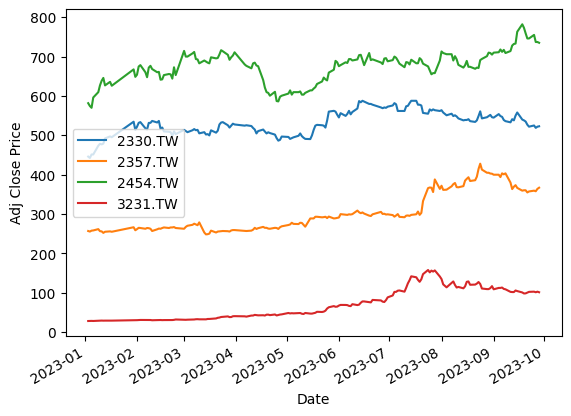

In [ ]:
M=len(data)
print(data)
acp=data.plot().set_ylabel("Adj Close Price")

###Percentage change
$$r_t=\frac{S_{t}-S_{t-1}}{S_{t-1}}$$

             2330.TW   2357.TW   2454.TW   3231.TW
Date                                              
2023-01-03  1.000000  1.000000  1.000000  1.000000
2023-01-04  0.992274  0.994444  0.987578  1.006849
2023-01-05  1.020022  1.009311  0.992138  1.003401
2023-01-06  1.000000  1.001845  1.045959  0.993220
2023-01-09  1.049073  1.012891  1.022727  1.023891
...              ...       ...       ...       ...
2023-09-22  0.990512  1.007042  1.000000  1.019900
2023-09-25  1.005747  1.005594  1.012064  1.004878
2023-09-26  0.988571  0.995828  0.976159  0.985437
2023-09-27  1.005780  1.016760  1.000000  1.014778
2023-09-28  1.001916  1.008242  0.997286  0.985437

[176 rows x 4 columns]


<Axes: xlabel='Date'>

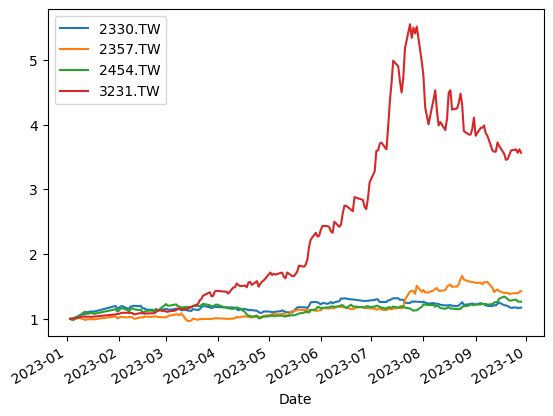

In [ ]:
prt_change = pd.DataFrame()
for stock in stocks_list:
  St=pd.DataFrame({stock:data[stock]})
  i=1
  for Sprev in data[stock][:-1]:
    St[stock][i]=(St[stock][i]-Sprev)/Sprev+1
    i+=1
  St[stock][0]=1
  prt_change=pd.concat([prt_change, St], axis=1)
print(prt_change)
prt_change.cumprod(axis = 0).plot()

###Log return
$$r_t=ln(\frac{S_{t}}{S_{t-1}})$$

             2330.TW   2357.TW   2454.TW   3231.TW
Date                                              
2023-01-03  1.000000  1.000000  1.000000  1.000000
2023-01-04  0.992244  0.994429  0.987500  1.006826
2023-01-05  1.019824  1.009268  0.992107  1.003396
2023-01-06  1.000000  1.001843  1.044934  0.993197
2023-01-09  1.047907  1.012809  1.022473  1.023610
...              ...       ...       ...       ...
2023-09-22  0.990467  1.007018  1.000000  1.019705
2023-09-25  1.005731  1.005579  1.011992  1.004866
2023-09-26  0.988506  0.995819  0.975870  0.985330
2023-09-27  1.005764  1.016621  1.000000  1.014670
2023-09-28  1.001914  1.008208  0.997283  0.985330

[176 rows x 4 columns]


<Axes: xlabel='Date'>

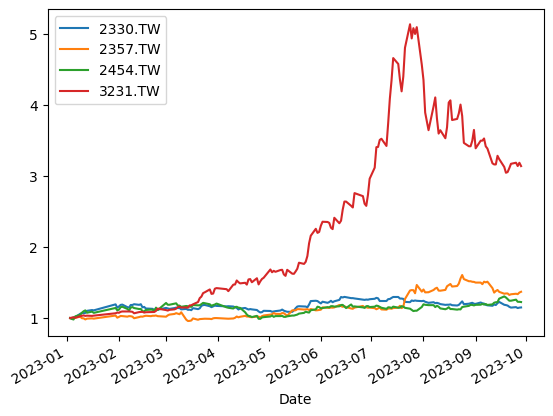

In [ ]:
log_rtn = pd.DataFrame()
for stock in stocks_list:
  St=pd.DataFrame({stock:data[stock]})
  i=1
  for Sprev in data[stock][:-1]:
    St[stock][i]=math.log((St[stock][i])/Sprev)+1
    i+=1
  St[stock][0]=1
  log_rtn=pd.concat([log_rtn, St], axis=1)
print(log_rtn)
log_rtn.cumprod(axis = 0).plot()

In [ ]:
std_dev = np.std(data)
tmp=np.zeros([1,N])
rtn = pd.DataFrame(tmp,columns=stocks_list)
for stock in stocks_list:
  rtn[stock]=(data[stock][-1]/data[stock][0])
rtn

,2330.TW,2357.TW,2454.TW,3231.TW
0,1.17271,1.427793,1.263656,3.564241
